In [1]:
import numpy as np
import pandas as pd
import os, time, re
import pickle, gzip, datetime

from datetime import datetime

now = datetime.now()

import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
import matplotlib as mpl



from sklearn import preprocessing as pp
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import log_loss
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.metrics import roc_curve, auc, roc_auc_score, mean_squared_error
import lightgbm as lgb


import tensorflow as tf
import keras
from tensorflow.keras.models import Sequential, Model
from keras.preprocessing.text import one_hot,Tokenizer
from tensorflow.keras.layers import Activation, Dense, Dropout
from tensorflow.keras.layers import BatchNormalization, Input, Lambda
from tensorflow.keras.layers import Embedding, Flatten, dot
from tensorflow.keras import regularizers
from tensorflow.keras.losses import mse, binary_crossentropy

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
books = pd.read_csv('/content/drive/MyDrive/ratings.csv')



In [4]:
n_users = books.user_id.unique().shape[0]
n_books = books.book_id.unique().shape[0]

In [5]:
x_train, x_test = train_test_split(books,
test_size=0.10, shuffle=True, random_state=2018)

In [21]:
n_latent_factors = 1
user_input = Input(shape=[1], name='user')
user_embedding = Embedding(input_dim=n_users + 1, output_dim=n_latent_factors,
name='user_embedding')(user_input)
user_vec = Flatten(name='flatten_users')(user_embedding)
book_input = Input(shape=[1], name='books')
book_embedding = Embedding(input_dim=n_books + 1,
output_dim=n_latent_factors,
name='book_embedding')(book_input)
book_vec = Flatten(name='flatten_books')(book_embedding)
product = dot([book_vec, user_vec], axes=1)
model = Model(inputs=[user_input, book_input], outputs=product)
model.compile('adam', 'mean_squared_error')

In [ ]:
history = model.fit(x=[x_train.user_id, x_train.book_id],
                    y=x_train.rating, epochs=20,
                    validation_data=([x_test.user_id,
                                      x_test.book_id], x_test.rating),
                    verbose=1)

Epoch 1/20
27612/27612 [==============================] - 67s 2ms/step - loss: 15.2946 - val_loss: 13.6817
Epoch 2/20
27612/27612 [==============================] - 65s 2ms/step - loss: 10.2944 - val_loss: 7.3412
Epoch 3/20
27612/27612 [==============================] - 64s 2ms/step - loss: 5.3301 - val_loss: 4.3390
Epoch 4/20
27612/27612 [==============================] - 64s 2ms/step - loss: 3.4612 - val_loss: 3.2707
Epoch 5/20
27612/27612 [==============================] - 68s 2ms/step - loss: 2.6996 - val_loss: 2.7173
Epoch 6/20
27612/27612 [==============================] - 65s 2ms/step - loss: 2.2516 - val_loss: 2.3323
Epoch 7/20
27612/27612 [==============================] - 61s 2ms/step - loss: 1.9019 - val_loss: 1.9789
Epoch 8/20
27612/27612 [==============================] - 61s 2ms/step - loss: 1.5549 - val_loss: 1.5976
Epoch 9/20
27612/27612 [==============================] - 64s 2ms/step - loss: 1.1923 - val_loss: 1.2481
Epoch 10/20
27612/27612 [===========================

Minimum MSE:  0.8378400206565857


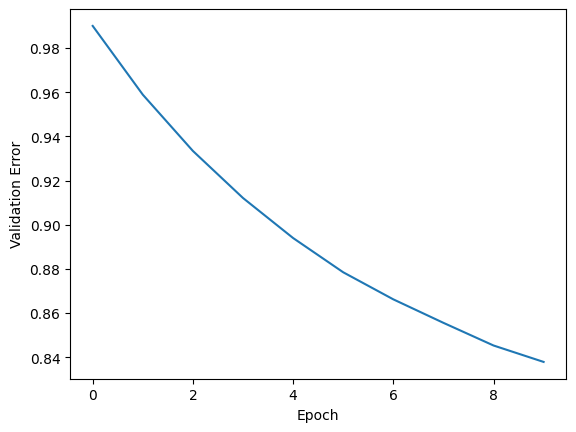

In [8]:
pd.Series(history.history['val_loss'][10:]).plot(logy=False)
plt.xlabel("Epoch")
plt.ylabel("Validation Error")
print('Minimum MSE: ', min(history.history['val_loss']))

In [14]:
import numpy as np
predictions = model.predict([x_test['user_id'],x_test['book_id']])
print(predictions)
# def recommend(user_id):


3068/3068 [==============================] - 5s 1ms/step
[[3.7290041]
 [3.7081342]
 [0.8674344]
 ...
 [4.567996 ]
 [3.9167523]
 [4.0807457]]
